##Introducción

El servicio de venta de autos usados Rusty Bargain está desarrollando una aplicación para atraer nuevos clientes. Gracias a esa app, puedes averiguar rápidamente el valor de mercado de tu coche. Los datos nos dan acceso al historial: especificaciones técnicas, versiones de equipamiento y precios. Tenemos que crear un modelo que determine el valor de mercado.

A Rusty Bargain le interesa:

- la calidad de la predicción
- la velocidad de la predicción
- el tiempo requerido para el entrenamiento

<h1>Tabla de contenidos<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparación-de-datos" data-toc-modified-id="Preparación-de-datos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparación de datos</a></span><ul class="toc-item"><li><span><a href="#Cargar-datos" data-toc-modified-id="Cargar-datos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Cargar datos</a></span></li><li><span><a href="#Explorar-datos-iniciales" data-toc-modified-id="Explorar-datos-iniciales-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Explorar datos iniciales</a></span></li></ul></li><li><span><a href="#Entrenamiento-del-modelo" data-toc-modified-id="Entrenamiento-del-modelo-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Entrenamiento del modelo</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Decision-Tree-Regressor" data-toc-modified-id="Decision-Tree-Regressor-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Decision Tree Regressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#lightgbm" data-toc-modified-id="lightgbm-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>lightgbm</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#Análisis-del-modelo" data-toc-modified-id="Análisis-del-modelo-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Análisis del modelo</a></span></li><li><span><a href="#Conclusiones-generales" data-toc-modified-id="Conclusiones-generales-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusiones generales</a></span></li></ul></div>

## Preparación de datos

In [ ]:
##Librerías que vamos a usar
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

### Cargar datos

In [ ]:
df= pd.read_csv('/datasets/car_data.csv')

### Explorar datos iniciales

In [ ]:
df.sample(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
285603,03/04/2016 11:47,150,NaN,1995,NaN,0,calibra,150000,8,petrol,opel,NaN,03/04/2016 00:00,0,24211,07/04/2016 12:45
78507,21/03/2016 23:56,3700,suv,2002,manual,140,sorento,150000,12,gasoline,kia,no,21/03/2016 00:00,0,99998,05/04/2016 15:17
22280,05/03/2016 20:46,0,coupe,1991,manual,150,calibra,150000,0,petrol,opel,NaN,05/03/2016 00:00,0,14656,12/03/2016 16:18
136736,21/03/2016 22:00,3500,wagon,1997,manual,150,3er,150000,7,petrol,bmw,no,21/03/2016 00:00,0,1744,07/04/2016 02:46
216610,02/04/2016 22:56,3300,sedan,2000,auto,224,e_klasse,150000,0,petrol,mercedes_benz,NaN,02/04/2016 00:00,0,21149,04/04/2016 23:47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

El conjunto de datos tiene varias columnas con valores nulos.  Vamos a revisar qué características tienen dichos valores. Además de que el formato del nombre de las columnas no es el óptimo para trabajar. Transformaremos estos nombres en formato snake case.

**Valores ausentes**

In [ ]:
df.isna().any(1).sum()

108555

In [ ]:
df.isna().any(0).sum()

5

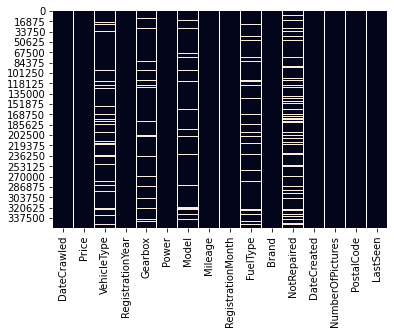

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Cinco columnas tienen valores ausentes. Tenemos muchas filas con valores ausentes así que no podemos eliminarlos ni rellenarlos ya que son categorías particulares de cada vehículo y es complicado predecir cuál es el dato que pertenece a cada uno. Los dejaremos como están para no afectar nuestro conjunto de datos. 

**Formato de columnas**

In [ ]:
#Ponemos todos los nombres de las columnas en mínusculas
df.columns = df.columns.str.lower()

In [ ]:
#Renombramos a las columnas para tener la notación snake_case 
df.rename(columns={'datecrawled':'date_crawled', 'vehicletype': 'vehicle_type',  'registrationyear' : 'registration_year', 'registrationmonth':'registration_month', 
                               'fueltype':'fuel_type', 'notrepaired':'not_repaired', 'numberofpictures': 'number_of_pictures', 'postalcode':'postal_code', 'lastseen':'last_seen',
                                'datecreated':'date_created'}, inplace=True) 
df.columns

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'mileage', 'registration_month', 'fuel_type', 'brand',
       'not_repaired', 'date_created', 'number_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

**Eliminando columnas que no aportan información relevante**

In [ ]:
#Eliminaremos cuatro columnas de nuestro conjunto de datos que no nos aportan información relevante para construir nuestros modelos.
df.drop(['date_crawled', 'date_created','postal_code', 'last_seen'],axis = 1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   price               354369 non-null  int64 
 1   vehicle_type        316879 non-null  object
 2   registration_year   354369 non-null  int64 
 3   gearbox             334536 non-null  object
 4   power               354369 non-null  int64 
 5   model               334664 non-null  object
 6   mileage             354369 non-null  int64 
 7   registration_month  354369 non-null  int64 
 8   fuel_type           321474 non-null  object
 9   brand               354369 non-null  object
 10  not_repaired        283215 non-null  object
 11  number_of_pictures  354369 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 32.4+ MB


## Entrenamiento del modelo 

Vamos a codificar las características categoricas para poder entrenar a nuestros modelos de regresión lineal y dos más basados en árboles.

In [ ]:
#Codificación One-Hot de características categóricas
data_oh= pd.get_dummies(df, columns=['vehicle_type', 'gearbox', 'model','fuel_type','brand', 'not_repaired'], drop_first=True)
target = data_oh['price']
features = data_oh.drop('price', axis=1)

In [ ]:
#Dividimos los datos en un conjunto de entrenamiento y uno de prueba 75:25
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

In [ ]:
#Escalado de datos. Estandarizar las características númericas.
#La variable numeric contiene la lista con todas las caraterísticas númericas
numeric = ['registration_year', 'power', 'mileage', 'registration_month','number_of_pictures']

In [ ]:
#escalado de caracteristicas 
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
target_train = target_train.values
target_test = target_test.values

print(features_train.shape)
print(target_train.shape)
print(target_test.shape)
print(features_test.shape)

/tmp/ipykernel_27/3358173969.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


(265776, 308)
(265776,)
(88593,)
(88593, 308)


/tmp/ipykernel_27/3358173969.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_test[numeric] = scaler.transform(features_test[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


### Linear Regression

La regresión lineal no es muy buena para el ajuste de hiperparámetros, pero es perfecta para hacer una prueba de cordura de otros métodos.

In [ ]:
%%time
model_lr = LinearRegression()
model_lr.fit(features_train, target_train) 
predictions_test_lr = model_lr.predict(features_test)
rmse_lr = sqrt(mean_squared_error(target_test, predictions_test_lr))
print('RMSE:', rmse_lr)

RMSE: 3252.1239761177635
CPU times: user 16.5 s, sys: 6.19 s, total: 22.7 s
Wall time: 22.7 s


### Decision Tree Regressor

In [ ]:
%%time
for depth in range(1, 5):
    model_dtr = DecisionTreeRegressor(random_state=12345, max_depth= depth)
    model_dtr.fit(features_train, target_train)
    predictions_test_dtr = model_dtr.predict(features_test)
    rmse_dtr = sqrt(mean_squared_error(target_test, predictions_test_dtr))
    
    print("max_depth =", depth, ": ", end='')    
    print('RMSE:', rmse_dtr) 

max_depth = 1 : RMSE: 3799.223761467872
max_depth = 2 : RMSE: 3309.152445475144
max_depth = 3 : RMSE: 3012.494273591973
max_depth = 4 : RMSE: 2738.4797365405607
CPU times: user 5.14 s, sys: 588 ms, total: 5.73 s
Wall time: 5.77 s


### Random Forest Regressor

In [ ]:
%%time

best_model = None
best_result = 10000
best_est = 0
best_depth = 0

for est in range(100, 151,50):
    for depth in range (4,6):
        model_rfr = RandomForestRegressor(random_state=12345,n_estimators=est, max_depth=depth)
        model_rfr.fit(features_train, target_train)
        predictions_test_rfr = model_rfr.predict(features_test) 
        result = sqrt(mean_squared_error(target_test, predictions_test_rfr))
        
        if result < best_result:
            best_model = model_rfr
            best_result = result
            best_est = est
            best_depth = depth

            
print('RMSE:', best_result, 'n_estimators:', best_est, 'best_depth:', best_depth)

RMSE: 2501.405581410538 n_estimators: 100 best_depth: 5
CPU times: user 11min 41s, sys: 2.12 s, total: 11min 44s
Wall time: 11min 44s


De los tres modelos anteriores el que obtuvo mejores resultados en cuanto a menor error (RMSE) es el RandomForestRegressor. Tomando en cuenta la variable del tiempo de ejecución, el de mejor rendimiento, por lo tanto, de menor tiempo de ejecución, fue el DecisionTreeRegressor. 

### lightgbm

En esta sección vamos a entrenar dos modelos de potenciación de gradiente: Lightgbm y XGboost. Lightgbm tiene su propia implementación para procesar las variables categoricas así que no utilizaremos la codificación OHE con este modelo. 

In [ ]:
#Separamos nuestro conjunto de datos originales en features y target
features_ori = df.drop('price', axis=1)
target_ori= df.price

In [ ]:
# Tranformamos las características categoricas en el tipo adecuado para LightGMB
for c in features_ori.columns:
    col_type = features_ori[c].dtype
    if col_type == 'object' or col_type.name == 'category':
        features_ori[c] = features_ori[c].astype('category')

In [ ]:
features_train_ori, features_test_ori, target_train_ori, target_test_ori = train_test_split(
    features_ori, target_ori, test_size=0.25, random_state=12345)

In [ ]:
#Creando un diccionario con las iteraciones del modelo
grid = dict()
# valores para iterar
grid['learning_rate'] = [0.01, 0.5]
grid['max_depth'] = [-1,1,2]
grid['n_estimators'] = [100,200]

In [ ]:
# aplicando el métidi GridSearchCV
grid_search = GridSearchCV(estimator=model_reg, param_grid=grid, n_jobs=-1, cv=3)
# guardando los valores
grid_result = grid_search.fit(features_train_ori,target_train_ori)
# imprimiendo los mejores parametros
print("Accuracy score: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Accuracy score: 0.845782 using {'learning_rate': 0.5, 'max_depth': -1, 'n_estimators': 200}


In [ ]:
%%time
#iniciando el modelo
model_reg = lgb.LGBMRegressor(**grid_result.best_params_)
model_reg.fit(features_train_ori,target_train_ori)
reg_pred = model_reg.predict(features_test_ori)
mse_reg = mean_squared_error(target_test_ori, reg_pred)
rmse_reg = sqrt(mean_squared_error(target_test_ori, reg_pred))
rmse_reg

CPU times: user 7.03 s, sys: 23.7 ms, total: 7.05 s
Wall time: 7.01 s


1746.7738243775384

### XGBoost

In [ ]:
%%time
model_XGB = XGBRegressor()
model_XGB.fit(features_train,target_train)
XGB_pred = model_XGB.predict(features_test)
rmse_xgb = sqrt(mean_squared_error(target_test, XGB_pred))
rmse_xgb

CPU times: user 8min 3s, sys: 498 ms, total: 8min 3s
Wall time: 8min 4s


1812.67727710297

De los dos modelos de potenciación de gradiente que utilizamos, Lightgbm es el que obtuvo menor error (RMSE) en sus predicciones. Respecto a la variable del tiempo, este modelo también obtuvo el menor tiempo de ejecución. 

## Análisis del modelo

De los 5 modelos que hemos probado, Lightgbm es el que obtuvo menor error en sus predicciones, respecto al tiempo de ejecución fue el segundo con menor tiempo de ejecución, dos segundos más que el modelo con menor tiempo. 

In [ ]:
rmse_total = pd.DataFrame({'Algoritmo': ['LinearRegression','DecisionTreeRegressor', 'RandomForestRegressor', 'LGBMRegressor','XGBRegressor'],
    'RMSE': [rmse_lr, rmse_dtr, best_result,rmse_reg, rmse_xgb ]
})

rmse_total

,Algoritmo,RMSE
0,LinearRegression,3252.123976
1,DecisionTreeRegressor,2738.479737
2,RandomForestRegressor,2501.405581
3,LGBMRegressor,1746.773824
4,XGBRegressor,1812.677277


## Conclusiones generales

- Nuestro conjunto de datos contiene demasiadas filas con valores nulos. Los cuales se mantuvieron para no afectar el rendimiento de nuestros modelos.
- Se le dio formato snake case a nuestras columnas.
- Se eliminaron 4 columnas que no aportan relevancia para el entrenamiento de nuestros modelos.
- Los mejores modelos, en terminos de menor error, fueron los de potenciación del gradiente.
- El modelo Lightgbm puede considerarse que tiene el mejor desempeño tanto en predicción como en tiempo de ejecución de los 5 que se probaron. 